In [22]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
Housing_Data=pd.read_csv('Housing_Data_4.csv')
Housing_Data

,Unnamed: 0,bathrooms,bedrooms,city,country,currency,latitude,livingArea,longitude,lotAreaUnit,lotAreaValue,price,priceForHDP,rentZestimate,state,streetAddress,taxAssessedValue,zestimate,zipcode
0,0,4.0,4.0,Denver,USA,USD,39.724728,2202.0,-104.959140,sqft,3629.0,1500000.0,1500000.0,3170.0,CO,530 University Boulevard,726200.0,1031000.0,80206
1,1,3.0,4.0,Denver,USA,USD,39.648630,2659.0,-105.055405,sqft,12215.0,725000.0,725000.0,2429.0,CO,3781 S Benton Way,444900.0,455700.0,80235
2,2,5.0,4.0,Denver,USA,USD,39.770897,3991.0,-105.013214,sqft,6250.0,1800000.0,1800000.0,7454.0,CO,3926 Vallejo Street,621200.0,1395200.0,80211
3,3,5.0,6.0,Denver,USA,USD,39.665450,3838.0,-104.963524,sqft,8712.0,1500000.0,1500000.0,3746.0,CO,2832 S Race Street,712500.0,1474576.0,80210
4,4,3.0,4.0,Denver,USA,USD,39.769943,2292.0,-105.021260,sqft,4905.0,1200000.0,1200000.0,3405.0,CO,2730 W Denver Place,216300.0,870300.0,80211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,838,2.0,3.0,Mills,USA,USD,42.835503,3372.0,-106.413000,sqft,11761.2,449900.0,449900.0,2128.0,WY,1302 River Heights Dr,327731.0,431700.0,82604
839,839,2.0,4.0,Douglas,USA,USD,42.763844,2304.0,-105.382230,sqft,11325.6,110000.0,110000.0,1935.0,WY,403 N 4th St,135752.0,169900.0,82633
840,840,2.0,3.0,Evanston,USA,USD,41.254820,1150.0,-110.959460,sqft,576.0,159000.0,159000.0,1195.0,WY,801 Sioux Dr,114419.0,149900.0,82930
841,841,4.0,6.0,Gillette,USA,USD,44.245415,5022.0,-105.562035,sqft,424274.4,998000.0,998000.0,3622.0,WY,5221 Rocky Point Dr,638339.0,728600.0,82718


In [295]:
url = "https://zillow56.p.rapidapi.com/search"

querystring = {"location":"wy"}

headers = {
	"X-RapidAPI-Key": "f6fd2a3b43msh06966db0ff4374fp16ca51jsn9537597f00ef",
	"X-RapidAPI-Host": "zillow56.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

data=pd.DataFrame(response.json())

In [296]:
data_1=data.copy()

In [297]:
df=pd.DataFrame(columns=['bathrooms','bedrooms','city','country','currency','daysOnZillow','homeStatus','homeStatusForHDP','homeType','imgSrc','isFeatured','isNonOwnerOccupied','isPreforeclosureAuction','isPremierBuilder','isUnmappable','isZillowOwned','latitude','listing_sub_type','livingArea','longitude','lotAreaUnit','lotAreaValue','price','priceForHDP','rentZestimate','shouldHighlight','state','streetAddress','taxAssessedValue','zestimate','zipcode','zpid'])

In [298]:
data_2=data_1['results']
for outer_key, inner_dict in data_2.items():
    for inner_key in ['bathrooms','bedrooms','city','country','currency','daysOnZillow','homeStatus','homeStatusForHDP','homeType','imgSrc','isFeatured','isNonOwnerOccupied','isPreforeclosureAuction','isPremierBuilder','isUnmappable','isZillowOwned','latitude','listing_sub_type','livingArea','longitude','lotAreaUnit','lotAreaValue','price','priceForHDP','rentZestimate','shouldHighlight','state','streetAddress','taxAssessedValue','zestimate','zipcode','zpid']:
        if inner_key not in inner_dict:
            inner_dict[inner_key] = None
for i in range(len(data_1['results'])):
    df.loc[i]=[data_1['results'][i]['bathrooms'],data_1['results'][i]['bedrooms'],data_1['results'][i]['city'],data_1['results'][i]['country'],data_1['results'][i]['currency'],data_1['results'][i]['daysOnZillow'],data_1['results'][i]['homeStatus'],data_1['results'][i]['homeStatusForHDP'],data_1['results'][i]['homeType'],data_1['results'][i]['imgSrc'],data_1['results'][i]['isFeatured'],data_1['results'][i]['isNonOwnerOccupied'],data_1['results'][i]['isPreforeclosureAuction'],data_1['results'][i]['isPremierBuilder'],data_1['results'][i]['isUnmappable'],data_1['results'][i]['isZillowOwned'],data_1['results'][i]['latitude'],data_1['results'][i]['listing_sub_type'],data_1['results'][i]['livingArea'],data_1['results'][i]['longitude'],data_1['results'][i]['lotAreaUnit'],data_1['results'][i]['lotAreaValue'],data_1['results'][i]['price'],data_1['results'][i]['priceForHDP'],data_1['results'][i]['rentZestimate'],data_1['results'][i]['shouldHighlight'],data_1['results'][i]['state'],data_1['results'][i]['streetAddress'],data_1['results'][i]['taxAssessedValue'],data_1['results'][i]['zestimate'],data_1['results'][i]['zipcode'],data_1['results'][i]['zpid']]

In [299]:
Housing_Data=pd.concat([Housing_Data,df])

In [300]:
Housing_Data

,Unnamed: 0.1,Unnamed: 0,bathrooms,bedrooms,city,country,currency,daysOnZillow,homeStatus,homeStatusForHDP,...,price,priceForHDP,rentZestimate,shouldHighlight,state,streetAddress,taxAssessedValue,zestimate,zipcode,zpid
0,0.0,0.0,4.0,4.0,Denver,USA,USD,-1,FOR_SALE,FOR_SALE,...,1500000.0,1500000.0,3170.0,False,CO,530 University Boulevard,726200.0,1031000.0,80206,13328411
1,1.0,1.0,NaN,NaN,Denver,USA,USD,-1,FOR_SALE,FOR_SALE,...,600000.0,600000.0,2945.0,False,CO,634 Colorado Boulevard,522900.0,688900.0,80220,13393598
2,2.0,2.0,3.0,4.0,Denver,USA,USD,-1,FOR_SALE,FOR_SALE,...,725000.0,725000.0,2429.0,False,CO,3781 S Benton Way,444900.0,455700.0,80235,13429540
3,3.0,3.0,5.0,4.0,Denver,USA,USD,-1,FOR_SALE,FOR_SALE,...,1800000.0,1800000.0,7454.0,False,CO,3926 Vallejo Street,621200.0,1395200.0,80211,13299830
4,4.0,4.0,NaN,NaN,Denver,USA,USD,0,FOR_SALE,FOR_SALE,...,1025000.0,1025000.0,NaN,False,CO,1280 N Race,NaN,NaN,80206,2059749246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,NaN,NaN,1.0,2.0,Powell,USA,USD,0,FOR_SALE,FOR_SALE,...,210000.0,210000.0,None,False,WY,556 N Clark St,232527.0,None,82435,104686786
36,NaN,NaN,4.0,6.0,Gillette,USA,USD,0,FOR_SALE,FOR_SALE,...,998000.0,998000.0,3622,False,WY,5221 Rocky Point Dr,638339.0,728600,82718,104673347
37,NaN,NaN,None,None,Powell,USA,USD,0,FOR_SALE,FOR_SALE,...,785000.0,785000.0,None,False,WY,TBD Road 5N,None,None,82435,2062162084
38,NaN,NaN,1.0,2.0,Casper,USA,USD,0,FOR_SALE,FOR_SALE,...,183000.0,183000.0,926,False,WY,1401 Sheridan Dr,65568.0,175424,82604,55621891


In [303]:
Housing_Data.to_csv('Housing_Data.csv')

In [305]:
Housing_Data_1=Housing_Data.copy()

In [306]:
Housing_Data_1.to_csv('Housing_Data_1.csv')

In [331]:
Housing_Data

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,bathrooms,bedrooms,city,country,currency,daysOnZillow,homeStatus,...,price,priceForHDP,rentZestimate,shouldHighlight,state,streetAddress,taxAssessedValue,zestimate,zipcode,zpid
0,0,0.0,0.0,4.0,4.0,Denver,USA,USD,-1,FOR_SALE,...,1500000.0,1500000.0,3170.0,False,CO,530 University Boulevard,726200.0,1031000.0,80206.0,13328411
1,1,1.0,1.0,NaN,NaN,Denver,USA,USD,-1,FOR_SALE,...,600000.0,600000.0,2945.0,False,CO,634 Colorado Boulevard,522900.0,688900.0,80220.0,13393598
2,2,2.0,2.0,3.0,4.0,Denver,USA,USD,-1,FOR_SALE,...,725000.0,725000.0,2429.0,False,CO,3781 S Benton Way,444900.0,455700.0,80235.0,13429540
3,3,3.0,3.0,5.0,4.0,Denver,USA,USD,-1,FOR_SALE,...,1800000.0,1800000.0,7454.0,False,CO,3926 Vallejo Street,621200.0,1395200.0,80211.0,13299830
4,4,4.0,4.0,NaN,NaN,Denver,USA,USD,0,FOR_SALE,...,1025000.0,1025000.0,NaN,False,CO,1280 N Race,NaN,NaN,80206.0,2059749246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,35,NaN,NaN,1.0,2.0,Powell,USA,USD,0,FOR_SALE,...,210000.0,210000.0,NaN,False,WY,556 N Clark St,232527.0,NaN,82435.0,104686786
2146,36,NaN,NaN,4.0,6.0,Gillette,USA,USD,0,FOR_SALE,...,998000.0,998000.0,3622.0,False,WY,5221 Rocky Point Dr,638339.0,728600.0,82718.0,104673347
2147,37,NaN,NaN,NaN,NaN,Powell,USA,USD,0,FOR_SALE,...,785000.0,785000.0,NaN,False,WY,TBD Road 5N,NaN,NaN,82435.0,2062162084
2148,38,NaN,NaN,1.0,2.0,Casper,USA,USD,0,FOR_SALE,...,183000.0,183000.0,926.0,False,WY,1401 Sheridan Dr,65568.0,175424.0,82604.0,55621891


In [112]:
Housing_Data=Housing_Data.drop(columns=['Unnamed: 0'])

In [61]:
Housing_Data

,bathrooms,bedrooms,city,country,currency,latitude,livingArea,longitude,lotAreaUnit,lotAreaValue,price,priceForHDP,rentZestimate,state,streetAddress,taxAssessedValue,zestimate,zipcode
0,4.0,4.0,Denver,USA,USD,39.724728,2202.0,-104.959140,sqft,3629.0,1500000.0,1500000.0,3170.0,CO,530 University Boulevard,726200.0,1031000.0,80206
1,3.0,4.0,Denver,USA,USD,39.648630,2659.0,-105.055405,sqft,12215.0,725000.0,725000.0,2429.0,CO,3781 S Benton Way,444900.0,455700.0,80235
2,5.0,4.0,Denver,USA,USD,39.770897,3991.0,-105.013214,sqft,6250.0,1800000.0,1800000.0,7454.0,CO,3926 Vallejo Street,621200.0,1395200.0,80211
3,5.0,6.0,Denver,USA,USD,39.665450,3838.0,-104.963524,sqft,8712.0,1500000.0,1500000.0,3746.0,CO,2832 S Race Street,712500.0,1474576.0,80210
4,3.0,4.0,Denver,USA,USD,39.769943,2292.0,-105.021260,sqft,4905.0,1200000.0,1200000.0,3405.0,CO,2730 W Denver Place,216300.0,870300.0,80211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,2.0,3.0,Mills,USA,USD,42.835503,3372.0,-106.413000,sqft,11761.2,449900.0,449900.0,2128.0,WY,1302 River Heights Dr,327731.0,431700.0,82604
839,2.0,4.0,Douglas,USA,USD,42.763844,2304.0,-105.382230,sqft,11325.6,110000.0,110000.0,1935.0,WY,403 N 4th St,135752.0,169900.0,82633
840,2.0,3.0,Evanston,USA,USD,41.254820,1150.0,-110.959460,sqft,576.0,159000.0,159000.0,1195.0,WY,801 Sioux Dr,114419.0,149900.0,82930
841,4.0,6.0,Gillette,USA,USD,44.245415,5022.0,-105.562035,sqft,424274.4,998000.0,998000.0,3622.0,WY,5221 Rocky Point Dr,638339.0,728600.0,82718


In [361]:
Housing_Data=Housing_Data.drop_duplicates()

In [362]:
Housing_Data.duplicated().value_counts()

False    2101
dtype: int64

In [375]:
Housing_Data_2=Housing_Data.copy()

In [377]:
Housing_Data_2.to_csv('Hosing_Data_2.csv')

In [378]:
Housing_Data

,bathrooms,bedrooms,city,country,currency,latitude,livingArea,longitude,lotAreaUnit,lotAreaValue,price,priceForHDP,rentZestimate,state,streetAddress,taxAssessedValue,zestimate,zipcode,zpid
0,4.0,4.0,Denver,USA,USD,39.724728,2202.0,-104.959140,sqft,3629.000000,1500000.0,1500000.0,3170.0,CO,530 University Boulevard,726200.0,1031000.0,80206.0,13328411
1,NaN,NaN,Denver,USA,USD,39.726303,NaN,-104.940290,sqft,6250.000000,600000.0,600000.0,2945.0,CO,634 Colorado Boulevard,522900.0,688900.0,80220.0,13393598
2,3.0,4.0,Denver,USA,USD,39.648630,2659.0,-105.055405,acres,0.280418,725000.0,725000.0,2429.0,CO,3781 S Benton Way,444900.0,455700.0,80235.0,13429540
3,5.0,4.0,Denver,USA,USD,39.770897,3991.0,-105.013214,sqft,6250.000000,1800000.0,1800000.0,7454.0,CO,3926 Vallejo Street,621200.0,1395200.0,80211.0,13299830
4,NaN,NaN,Denver,USA,USD,39.736560,2867.0,-104.963130,sqft,3125.000000,1025000.0,1025000.0,NaN,CO,1280 N Race,NaN,NaN,80206.0,2059749246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,1.0,2.0,Powell,USA,USD,44.758972,1580.0,-108.756510,sqft,6969.600000,210000.0,210000.0,NaN,WY,556 N Clark St,232527.0,NaN,82435.0,104686786
2146,4.0,6.0,Gillette,USA,USD,44.245415,5022.0,-105.562035,acres,9.740000,998000.0,998000.0,3622.0,WY,5221 Rocky Point Dr,638339.0,728600.0,82718.0,104673347
2147,NaN,NaN,Powell,USA,USD,NaN,NaN,NaN,acres,160.000000,785000.0,785000.0,NaN,WY,TBD Road 5N,NaN,NaN,82435.0,2062162084
2148,1.0,2.0,Casper,USA,USD,42.836254,640.0,-106.352700,sqft,5200.000000,183000.0,183000.0,926.0,WY,1401 Sheridan Dr,65568.0,175424.0,82604.0,55621891


In [389]:
Housing_Data.isna().any(axis=1).sum()

1258

In [391]:
Housing_Data=Housing_Data.dropna()

In [394]:
Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 2099
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        843 non-null    int64  
 1   bathrooms         843 non-null    float64
 2   bedrooms          843 non-null    float64
 3   city              843 non-null    object 
 4   country           843 non-null    object 
 5   currency          843 non-null    object 
 6   latitude          843 non-null    float64
 7   livingArea        843 non-null    float64
 8   longitude         843 non-null    float64
 9   lotAreaUnit       843 non-null    object 
 10  lotAreaValue      843 non-null    float64
 11  price             843 non-null    float64
 12  priceForHDP       843 non-null    float64
 13  rentZestimate     843 non-null    float64
 14  state             843 non-null    object 
 15  streetAddress     843 non-null    object 
 16  taxAssessedValue  843 non-null    float64
 

In [113]:
Housing_Data['zipcode']=Housing_Data['zipcode'].astype(int)

In [398]:
Housing_Data_3=Housing_Data.copy()

In [399]:
Housing_Data_3.to_csv('Housing_Data_3')

In [421]:
Housing_Data.loc[Housing_Data['lotAreaUnit']=="acres","lotAreaValue"]=Housing_Data['lotAreaValue']*43560


In [426]:
Housing_Data['lotAreaUnit']=Housing_Data['lotAreaUnit'].apply(lambda x:x.replace('acres','sqft'))

In [430]:
Housing_Data.drop(columns='lotAraUnit',inplace=True)

In [124]:
Housing_Data=Housing_Data.drop(columns=['price','lotAreaValue'])
Housing_Data_5=Housing_Data.copy()
Housing_Data_5=Housing_Data.to_csv('Housing_Data_5.csv')

In [127]:
Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bathrooms         843 non-null    float64
 1   bedrooms          843 non-null    float64
 2   city              843 non-null    object 
 3   country           843 non-null    object 
 4   currency          843 non-null    object 
 5   latitude          843 non-null    float64
 6   livingArea        843 non-null    float64
 7   longitude         843 non-null    float64
 8   lotAreaUnit       843 non-null    object 
 9   priceForHDP       843 non-null    float64
 10  rentZestimate     843 non-null    float64
 11  state             843 non-null    object 
 12  streetAddress     843 non-null    object 
 13  taxAssessedValue  843 non-null    float64
 14  zestimate         843 non-null    float64
 15  zipcode           843 non-null    object 
 16  priceinmil        843 non-null    float64
 1

In [126]:
Housing_Data['zipcode']=Housing_Data['zipcode'].astype(object)

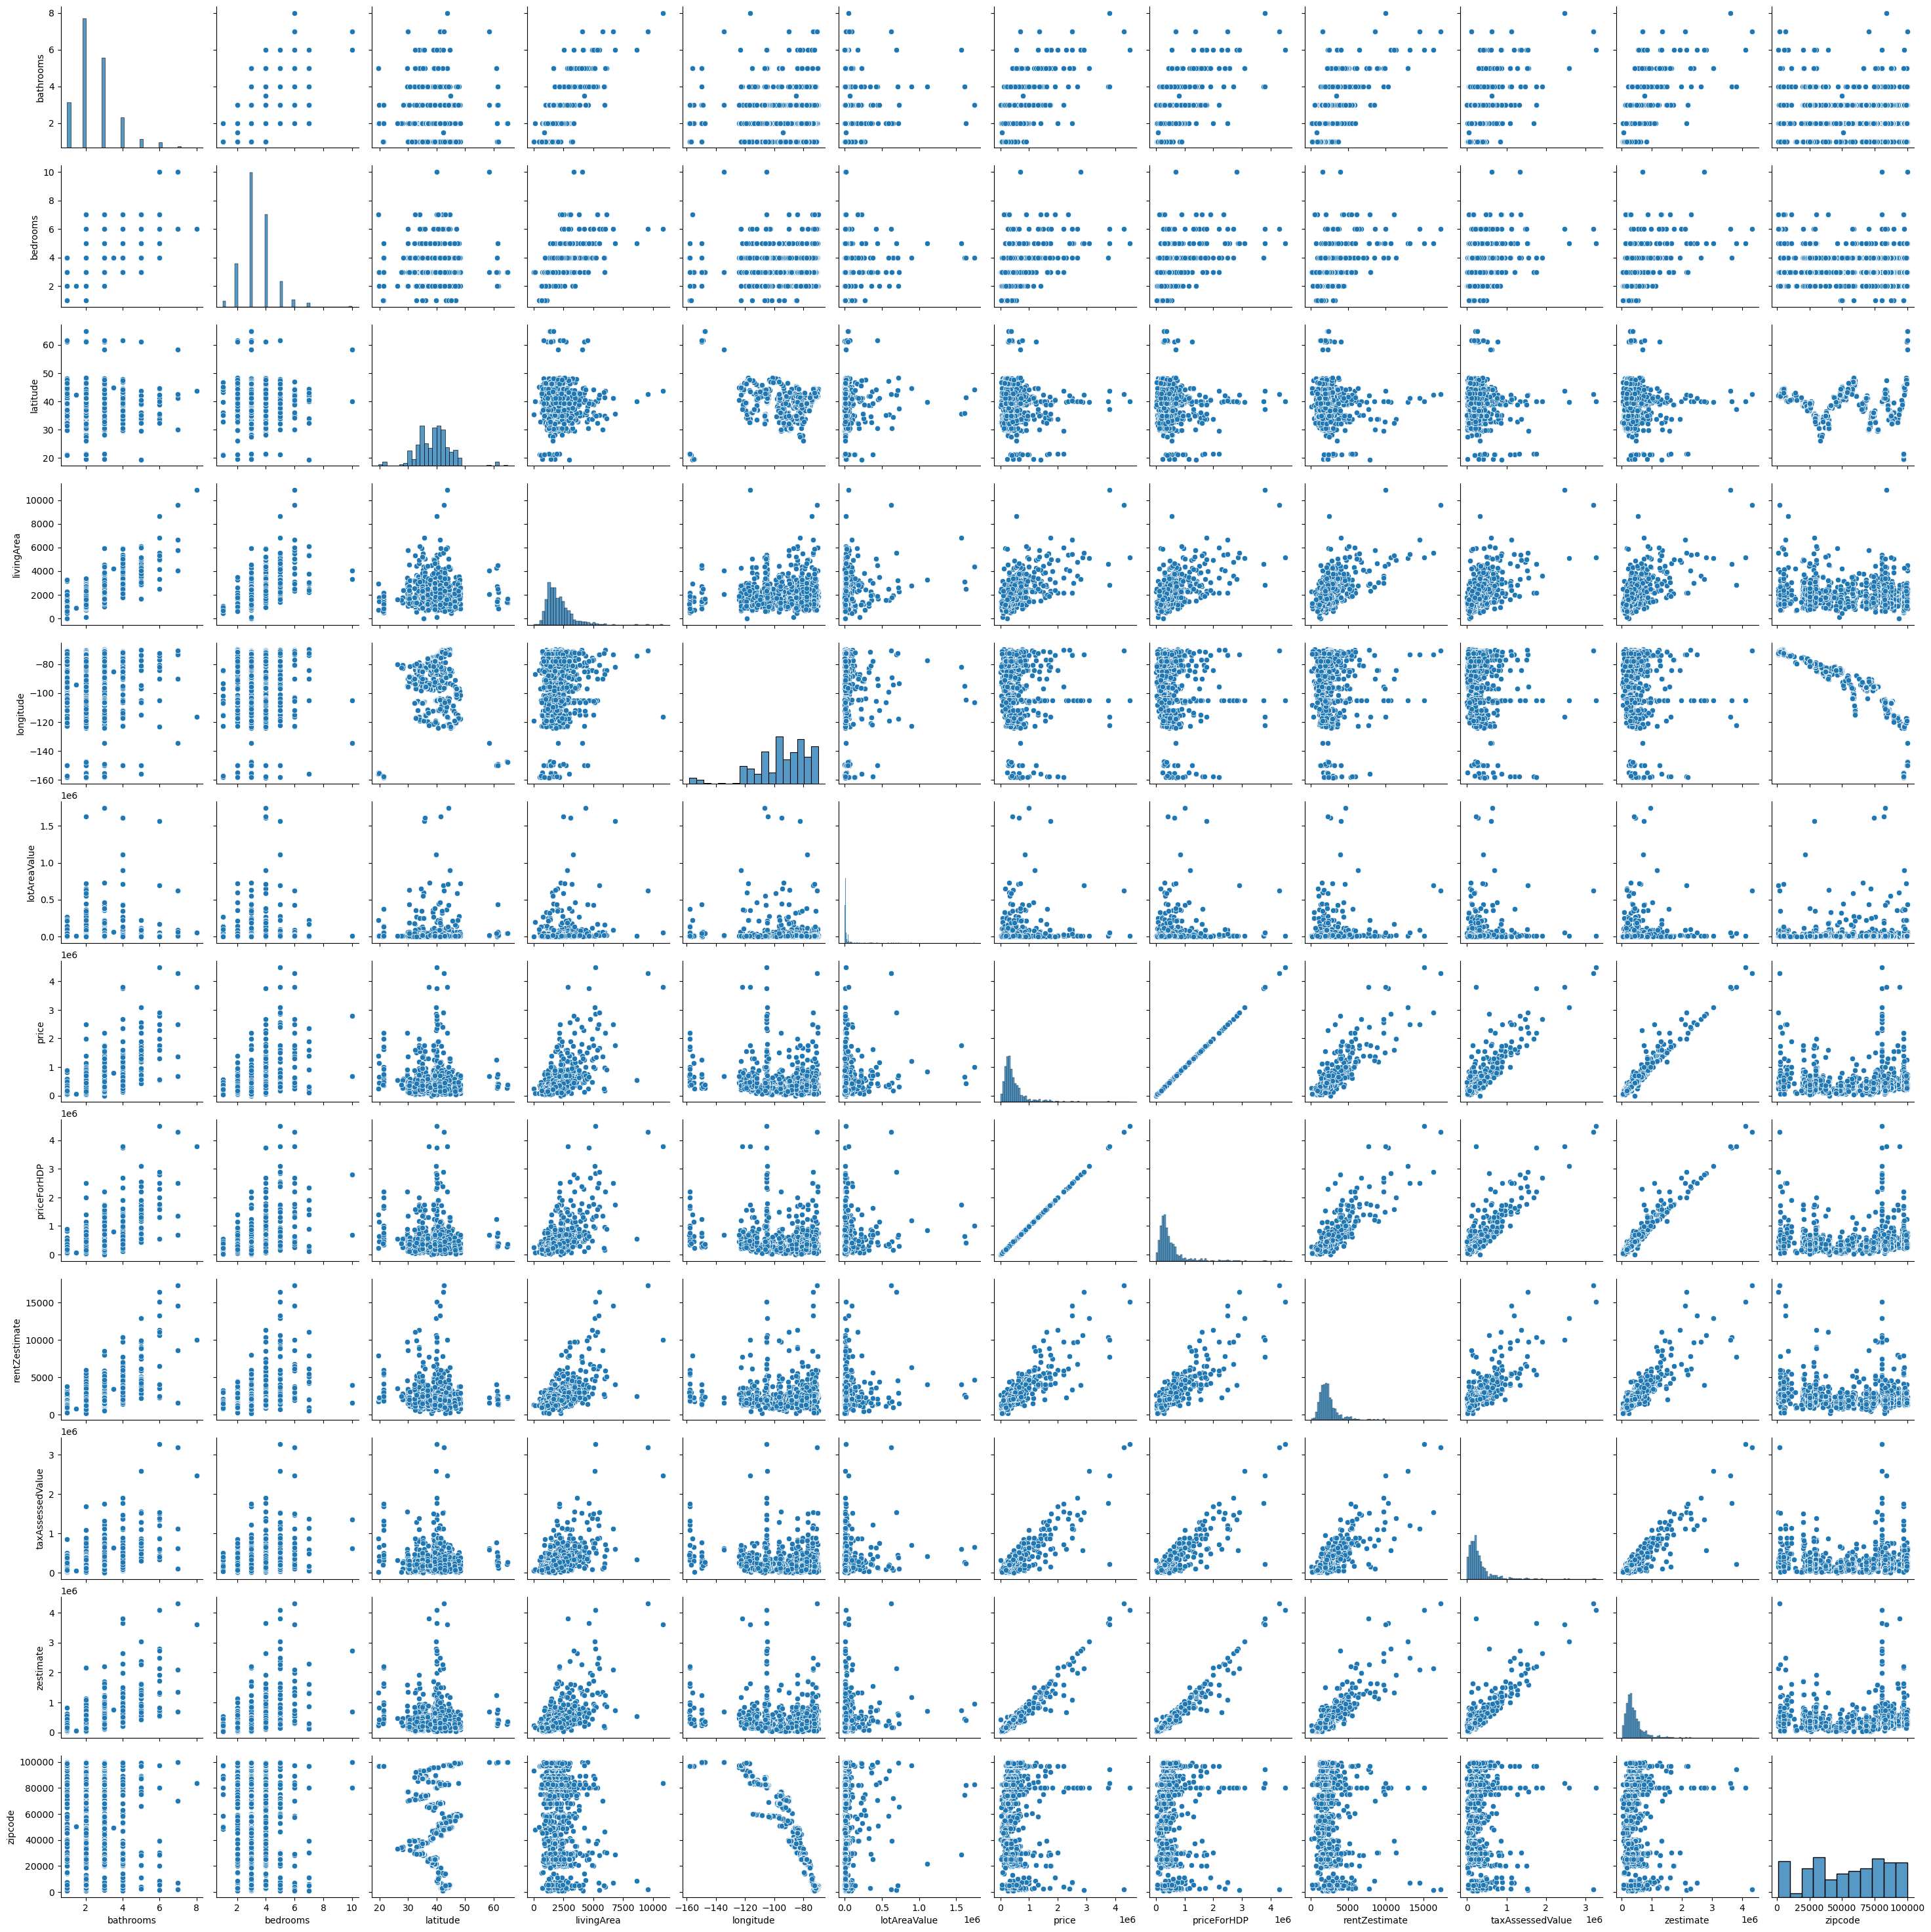

In [43]:
sns.pairplot(data=Housing_Data)

([<matplotlib.axis.YTick at 0x1f08bfc4640>,
 [Text(0, 0, '0'),
  Text(0, 1, '$1M'),
  Text(0, 2, '$2M'),
  Text(0, 3, '$3M'),
  Text(0, 4, '$4M')])

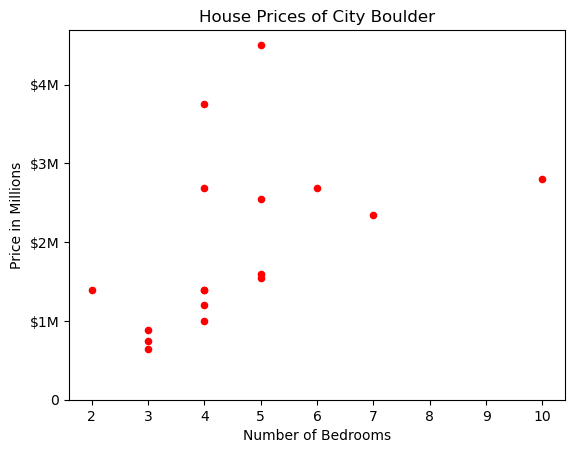

In [109]:
Boulder_Data=Housing_Data[Housing_Data['city']=='Boulder']
Boulder_Data.plot(x='bedrooms',y='priceinmil',kind='scatter',color='red')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Millions')
plt.title('House Prices of City Boulder')
y_tick_labels = ['0', '$1M', '$2M', '$3M', '$4M']
plt.yticks(ticks=[0,1,2,3,4],labels=y_tick_labels)

In [116]:
Housing_Data['priceinmil']=Housing_Data['price']/1000000

In [117]:
Housing_Data['lotArea']=Housing_Data['lotAreaValue']/1000

In [128]:
states=['WA','ND','MN','MI','TX','IL','KS','TN','CO','OK']
top_states=Housing_Data[Housing_Data['state'].isin(states)]

([<matplotlib.axis.YTick at 0x1f08d359eb0>,
 [Text(0, 0, '0'),
  Text(0, 1, '$1M'),
  Text(0, 2, '$2M'),
  Text(0, 3, '$3M'),
  Text(0, 4, '$4M')])

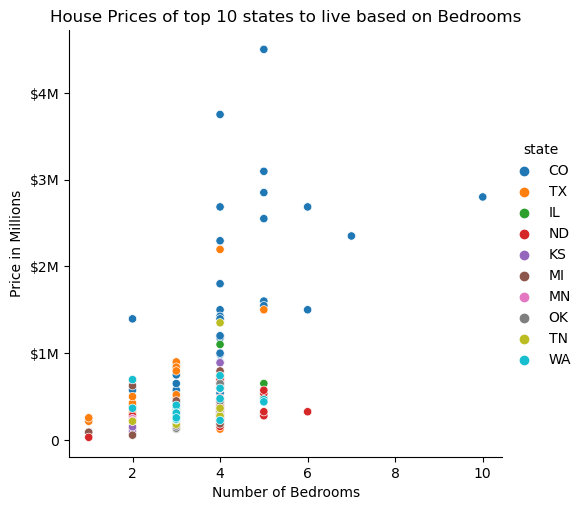

In [129]:
sns.relplot(data=top_states,x='bedrooms',y='priceinmil',hue='state')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Millions')
plt.title('House Prices of top 10 states to live based on Bedrooms')
y_tick_labels = ['0', '$1M', '$2M', '$3M', '$4M']
plt.yticks(ticks=[0,1,2,3,4],labels=y_tick_labels)


([<matplotlib.axis.YTick at 0x1f08d2fcee0>,
 [Text(0, 0, '0'),
  Text(0, 1, '$1M'),
  Text(0, 2, '$2M'),
  Text(0, 3, '$3M'),
  Text(0, 4, '$4M')])

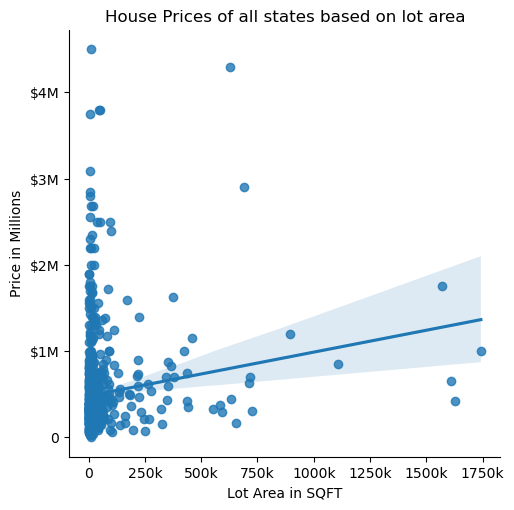

In [130]:
sns.lmplot(data=Housing_Data,x='lotArea',y='priceinmil')
plt.xlabel('Lot Area in SQFT')
plt.ylabel('Price in Millions')
plt.title('House Prices of all states based on lot area')
x_tick_labels = ['0', '250k', '500k', '750k', '1000k','1250k','1500k','1750k']
plt.xticks(ticks=[0,250,500,750,1000,1250,1500,1750],labels=x_tick_labels)
y_tick_labels = ['0', '$1M', '$2M', '$3M', '$4M']
plt.yticks(ticks=[0,1,2,3,4],labels=y_tick_labels)

([<matplotlib.axis.YTick at 0x1f08d3c7070>,
 [Text(0, 0, '0'),
  Text(0, 1, '$1M'),
  Text(0, 2, '$2M'),
  Text(0, 3, '$3M'),
  Text(0, 4, '$4M')])

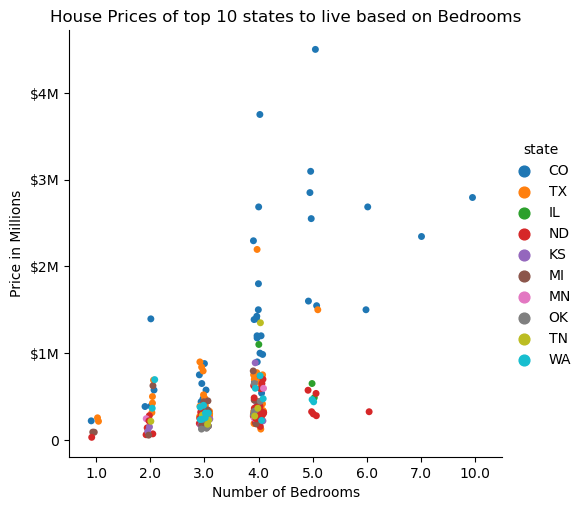

In [131]:
sns.catplot(data = top_states, x = 'bedrooms', y = 'priceinmil', hue = 'state')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Millions')
plt.title('House Prices of top 10 states to live based on Bedrooms')
y_tick_labels = ['0', '$1M', '$2M', '$3M', '$4M']
plt.yticks(ticks=[0,1,2,3,4],labels=y_tick_labels)

In [132]:
colorado=Housing_Data[Housing_Data['state']=='CO']

([<matplotlib.axis.YTick at 0x1f08d9c9e50>,
 [Text(0, 0, '0'),
  Text(0, 1, '$1M'),
  Text(0, 2, '$2M'),
  Text(0, 3, '$3M'),
  Text(0, 4, '$4M')])

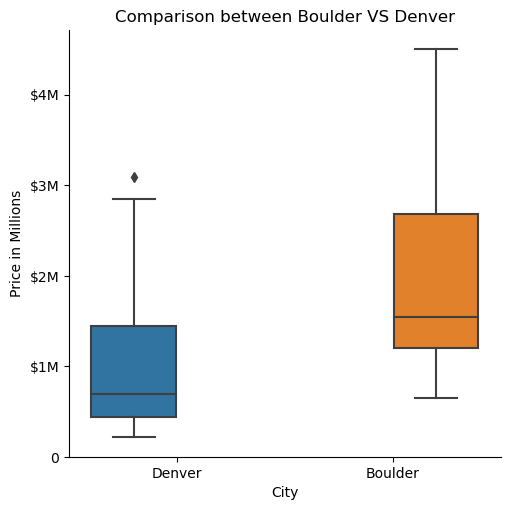

In [133]:
sns.catplot(data =colorado, x = 'city', y = 'priceinmil', kind = 'box', hue = 'city')
plt.xlabel('City')
plt.ylabel('Price in Millions')
plt.title('Comparison between Boulder VS Denver')
y_tick_labels = ['0', '$1M', '$2M', '$3M', '$4M']
plt.yticks(ticks=[0,1,2,3,4],labels=y_tick_labels)

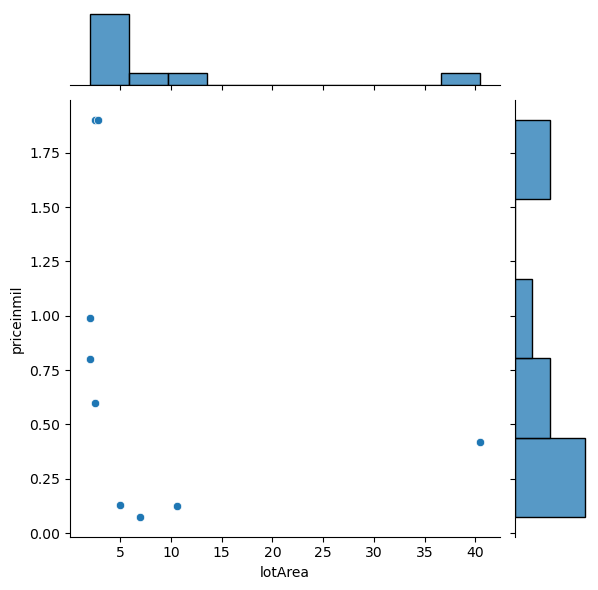

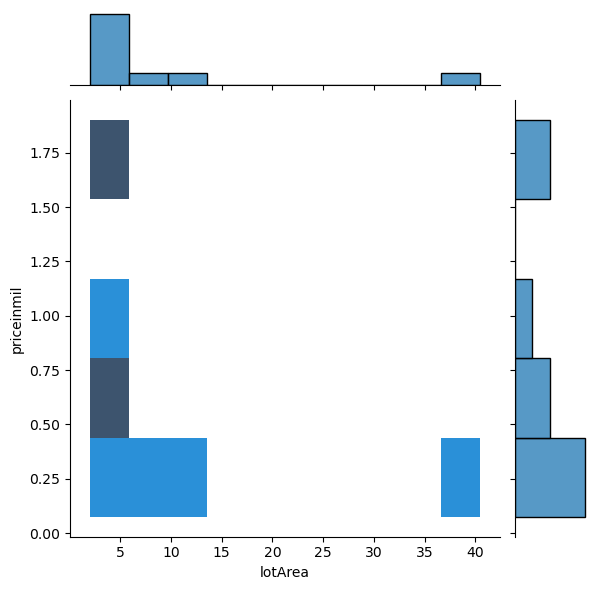

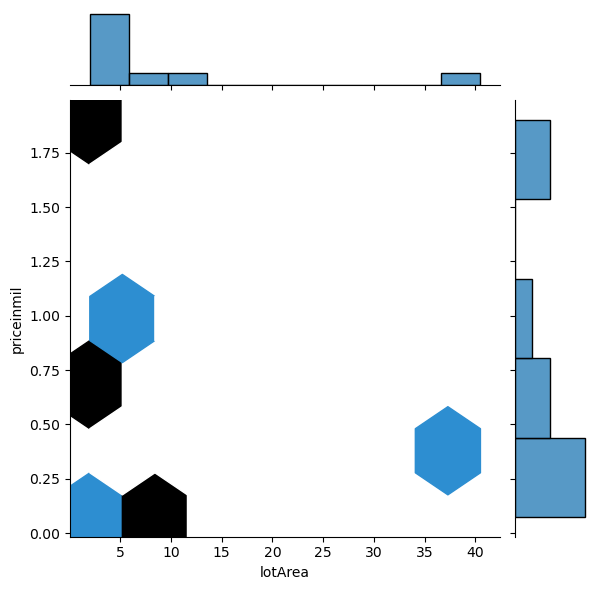

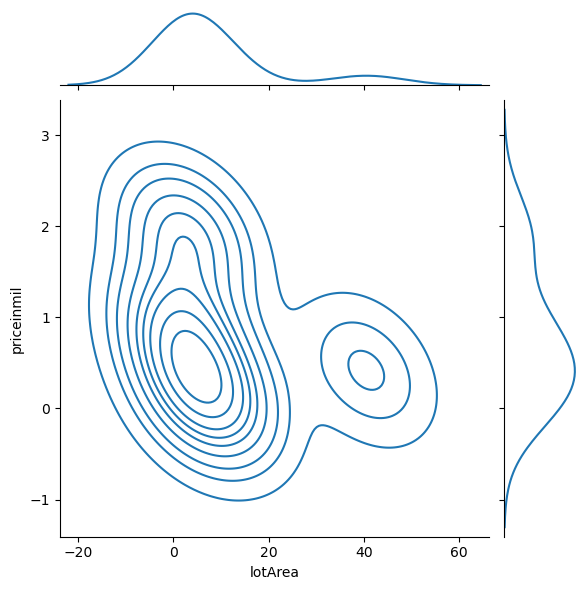

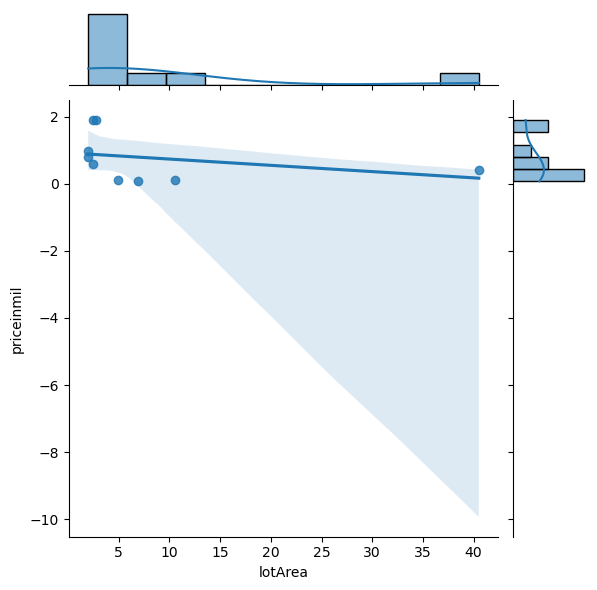

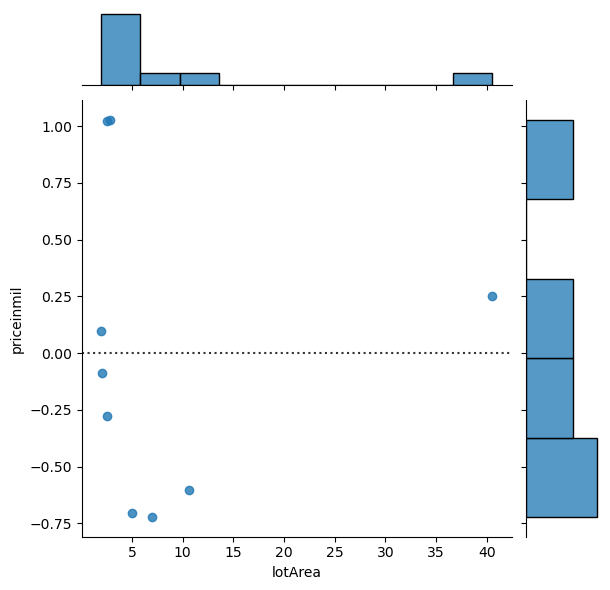

In [134]:

kind = ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid']
for k in kind:
  sns.jointplot(data = Housing_Data[Housing_Data['state']=='NY'], x = 'lotArea', y = 'priceinmil', kind = k)

<AxesSubplot:>

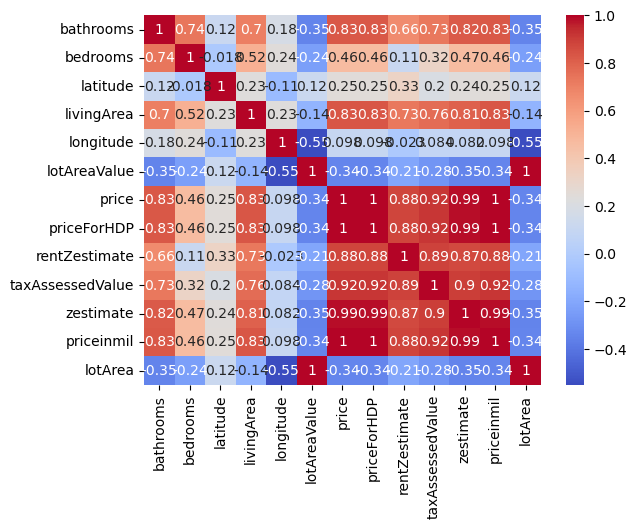

In [135]:

corr = Boulder_Data.corr()

# Draw a heatmap plot of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')